In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
from io import open
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
from scipy.stats import gaussian_kde
import scipy.stats as stats
import kgml_lib

In [2]:
from dataset import DataSet
from run_step2 import Kgml_Model

In [3]:
root_dir = 'E:/PyKGML/deposit_code_v2/'
data_path = root_dir +  'processed_data/'
output_path = root_dir + 'test_results/'

input_data = 'recotest_data_scaled_v4_100sample.sav'
sample_index_file = "traindataset_split_year_v1.sav"

pretrained_model = "recotest_v11_exp4.sav_step1"
output_model = "recotest_v11_exp4_sample.sav_step2"
synthetic_data = "sys_data2.sav"

In [4]:
dataset = DataSet(data_path, input_data, output_path, sample_index_file)
dataset.load()
dataset.prepare_step2_data()

torch.Size([6570, 100, 19]) torch.Size([6570, 100, 3]) torch.Size([18, 100, 1])
['RADN', 'TMAX_AIR', 'TDIF_AIR', 'HMAX_AIR', 'HDIF_AIR', 'WIND', 'PRECN', 'Crop_Type', 'GPP', 'Year', 'TBKDS', 'TSAND', 'TSILT', 'TFC', 'TWP', 'TKSat', 'TSOC', 'TPH', 'TCEC']


In [5]:
dataset.train_test_split(sample_index_file = sample_index_file)

Load sample index file E:/PyKGML/deposit_code_v2/processed_data/traindataset_split_year_v1.sav


In [6]:
model = Kgml_Model(output_path, output_path, pretrained_model, output_model, synthetic_data, dataset= dataset)
model.load_RecoGRU_multitask_v11_3()

GPU is available. Using: cuda


In [16]:
model.details()

RecoGRU_multitask_v11_3(
  (gru_basic): GRU(19, 64, num_layers=2, batch_first=True, dropout=0.2)
  (gru_Ra): GRU(83, 64, batch_first=True)
  (gru_Rh): GRU(84, 64, num_layers=2, batch_first=True, dropout=0.2)
  (gru_NEE): GRU(21, 64, batch_first=True)
  (drop): Dropout(p=0.2, inplace=False)
  (densor_Ra): Linear(in_features=64, out_features=1, bias=True)
  (densor_Rh): Linear(in_features=64, out_features=1, bias=True)
  (densor_NEE): Linear(in_features=64, out_features=1, bias=True)
  (attn): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Tanh()
  )
  (densor_yield): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
  

In [12]:
model.train_step2()

gru_Ra.weight_ih_l0
gru_Ra.weight_hh_l0
gru_Ra.bias_ih_l0
gru_Ra.bias_hh_l0
gru_Rh.weight_ih_l0
gru_Rh.weight_hh_l0
gru_Rh.bias_ih_l0
gru_Rh.bias_hh_l0
gru_Rh.weight_ih_l1
gru_Rh.weight_hh_l1
gru_Rh.bias_ih_l1
gru_Rh.bias_hh_l1
gru_NEE.weight_ih_l0
gru_NEE.weight_hh_l0
gru_NEE.bias_ih_l0
gru_NEE.bias_hh_l0
densor_Ra.weight
densor_Ra.bias
densor_Rh.weight
densor_Rh.bias
densor_NEE.weight
densor_NEE.bias
finished training epoch 1
train_loss:  [1.9908651014169056, 1.1292187869548798, 0.861646314462026, 0.0] train_R2 [0.8225356936454773, 0.5551836490631104, 0.359000563621521] val_loss: [0.11031708121299744, 0.07091523706912994, 0.03940184414386749, 0.0] val_R2 [0.8517670631408691, 0.7325953245162964, 0.7491141557693481] loss val best: 0.11031708121299744 R2 val best: [0.8517670631408691, 0.7325953245162964, 0.7491141557693481] Spending time: 4.122222900390625s
finished training epoch 2
train_loss:  [0.80642036596934, 0.4420997169282701, 0.36432064821322757, 0.0] train_R2 [0.901206135749816

finished training epoch 18
train_loss:  [0.3392719046937095, 0.15291455015540123, 0.18635735329654482, 0.0] train_R2 [0.9558014869689941, 0.9252278804779053, 0.9478241205215454] val_loss: [0.029536502435803413, 0.016903702169656754, 0.01263280026614666, 0.0] val_R2 [0.9604403376579285, 0.9296295046806335, 0.9512155055999756] loss val best: 0.029536502435803413 R2 val best: [0.9604403376579285, 0.9296295046806335, 0.9512155055999756] Spending time: 47.71204328536987s
finished training epoch 19
train_loss:  [0.32169778065549004, 0.14750801564918625, 0.17418976252277693, 0.0019578933715820312] train_R2 [0.9566487669944763, 0.9292032122612, 0.9490513205528259] val_loss: [0.03099452704191208, 0.016210313886404037, 0.014784212224185467, 0.0] val_R2 [0.9602397680282593, 0.9361122846603394, 0.951471745967865] loss val best: 0.029536502435803413 R2 val best: [0.9604403376579285, 0.9296295046806335, 0.9512155055999756] Spending time: 50.30129861831665s
finished training epoch 20
train_loss:  [0.

finished training epoch 36
train_loss:  [0.26153651169604725, 0.11607364875574906, 0.14546286376814047, 0.0] train_R2 [0.9655146598815918, 0.94476318359375, 0.9598071575164795] val_loss: [0.020962107926607132, 0.012808650732040405, 0.008153456263244152, 0.0] val_R2 [0.9693223237991333, 0.9478600025177002, 0.9625649452209473] loss val best: 0.01753568835556507 R2 val best: [0.9668442606925964, 0.9463110566139221, 0.9603333473205566] Spending time: 94.38817381858826s
finished training epoch 37
train_loss:  [0.25381654252608615, 0.11456799196700256, 0.13924855117996535, 0.0] train_R2 [0.966063380241394, 0.9452293515205383, 0.9604776501655579] val_loss: [0.018519002944231033, 0.01255931705236435, 0.005959684960544109, 0.0] val_R2 [0.970341682434082, 0.948621392250061, 0.9631147980690002] loss val best: 0.01753568835556507 R2 val best: [0.9668442606925964, 0.9463110566139221, 0.9603333473205566] Spending time: 96.96532201766968s
finished training epoch 38
train_loss:  [0.2502169600791401, 0

In [13]:
device = torch.device("cuda")
#device = torch.device('cpu')
model.test_step2('recotest_v11_exp4.sav_step2',device)

20
finished, 0 0 Spending time: 0.1244356632232666s
finished, 0 1 Spending time: 0.16286015510559082s
finished, 0 2 Spending time: 0.20090627670288086s
finished, 0 3 Spending time: 0.23850226402282715s
finished, 0 4 Spending time: 0.2504723072052002s
finished, 0 5 Spending time: 0.2564542293548584s
finished, 0 6 Spending time: 0.261474609375s
finished, 0 7 Spending time: 0.26642799377441406s
finished, 0 8 Spending time: 0.27393364906311035s
finished, 0 9 Spending time: 0.2779507637023926s
finished, 0 10 Spending time: 0.28441524505615234s
finished, 0 11 Spending time: 0.2894003391265869s
finished, 0 12 Spending time: 0.2934255599975586s
finished, 0 13 Spending time: 0.2973790168762207s
finished, 0 14 Spending time: 0.30436086654663086s
finished, 0 15 Spending time: 0.3093700408935547s
finished, 0 16 Spending time: 0.313368558883667s
finished, 0 17 Spending time: 0.3203449249267578s
finished, 1 0 Spending time: 0.3362901210784912s
finished, 1 1 Spending time: 0.3422865867614746s
finishe

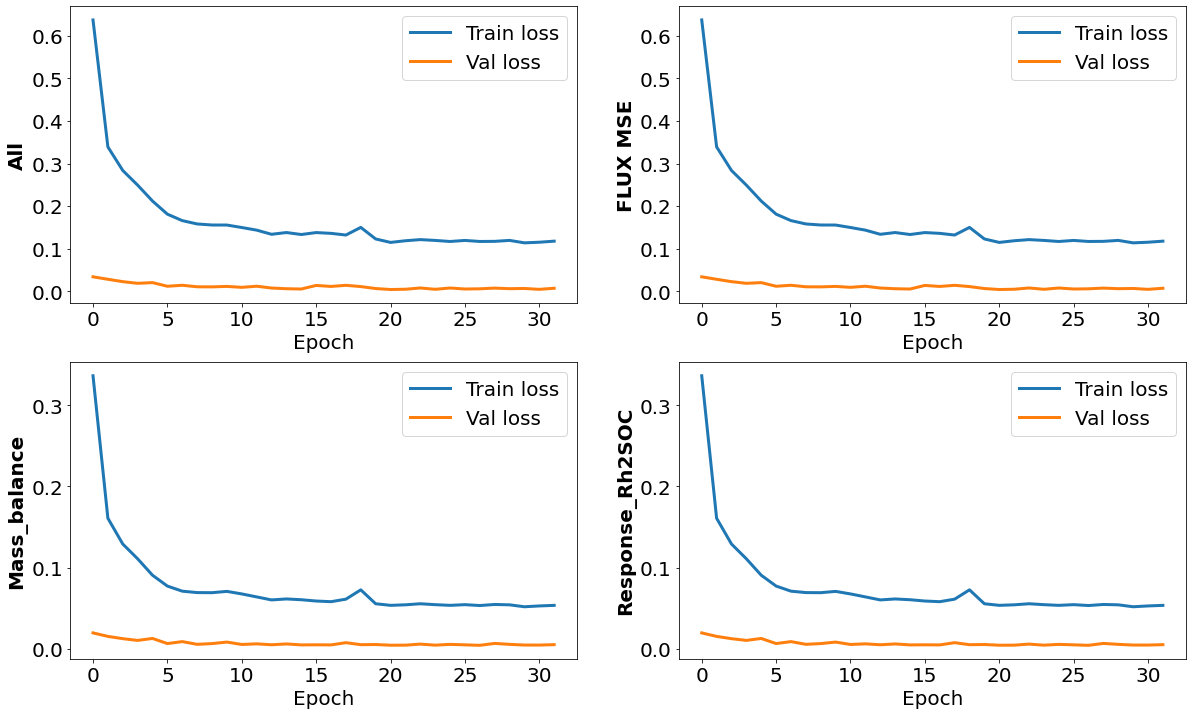

In [9]:
model.vis_loss('recotest_v11_exp4.sav_step2')

torch.Size([2, 18])
torch.Size([2, 18])


E:\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:160: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
E:\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:174: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
E:\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:176: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


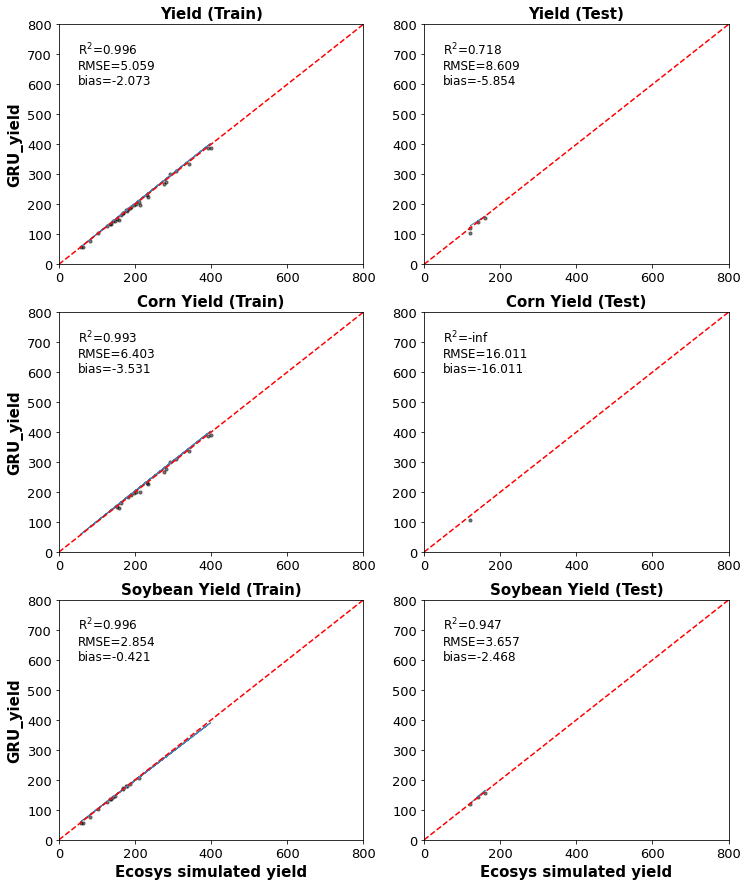

In [14]:
model.vis_yield_prediction()

0 0 torch.Size([1460]) torch.Size([1460])
0 1 torch.Size([1460]) torch.Size([1460])
0 2 torch.Size([1460]) torch.Size([1460])
1 0 torch.Size([4]) torch.Size([4])
1 1 torch.Size([4]) torch.Size([4])
1 2 torch.Size([4]) torch.Size([4])


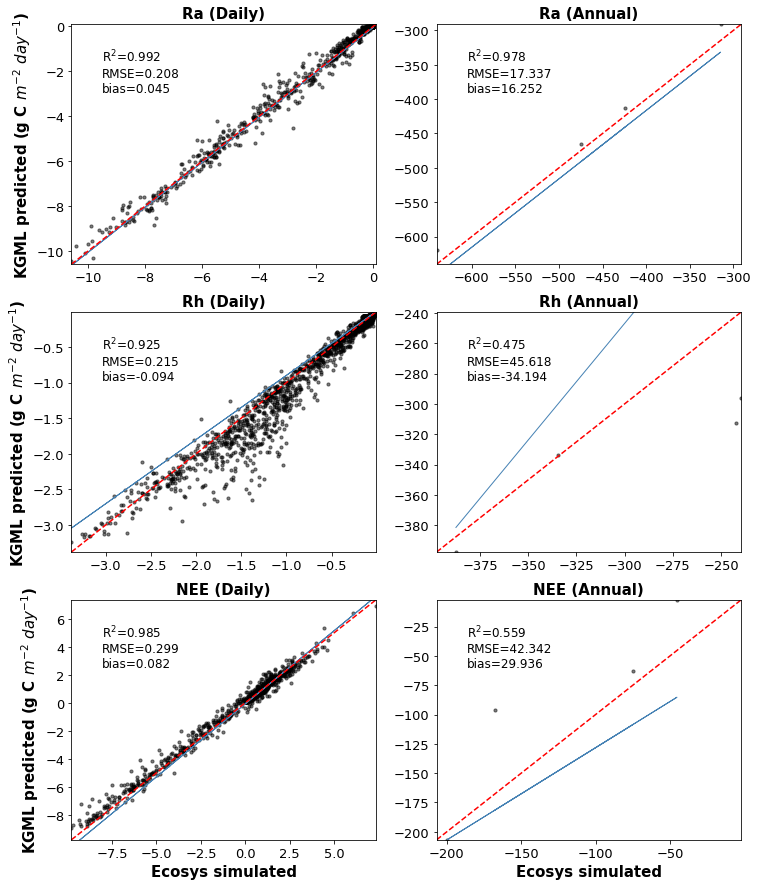

In [15]:
model.vis_flux_prediction()